In [ ]:
###basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### datos y modelos sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

####### redes neuronales

import tensorflow as tf
from tensorflow import keras
!pip install keras_tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
#cargar base de datos
url="https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients.csv"

credit_card=pd.read_csv(url)

In [ ]:
#analizar base de datos
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Identificar nulos
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

se identificaron 313 valores nulos en la variable MINIMUM_PAYMENTS y 1 nulo en la variable CREDIT_LIMIT

In [ ]:
# tratamiento de nulos
credit_card= credit_card.dropna()

Se decide eliminar los nulos dado que representan solo el 4% de los datos y es necesario hacer este tratamiento para ejecutar la red neuronal

In [ ]:
# verificar nuevamente los nulos
credit_card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Se vuelven a revisar los nulos para comprobar que el tratamiento funcionó correctamente

In [ ]:
# eliminar la variable CUST_ID
credit_card2 = credit_card.drop('CUST_ID', axis=1)
credit_card2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

Se decide eliminar la variable 'CUST_ID' dado que es un identificador de los usuarios, por lo que pueden afectar el modelo más adelante.

In [ ]:
###separar variable respuesta y variables explicativas
y_credit_card =credit_card2['PURCHASES']
X_credit_card =credit_card2[credit_card2.columns.difference(['PURCHASES'])]

In [ ]:
# valor minimo de la variable respuesta
y_credit_card.min()

0.0

Se identifica que la variable respuesta no toma valores negativos, esto será importante tenerlo en cuenta para definir la función de activación

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# escalar los datos
sc=StandardScaler().fit(X_credit_card)

#### exportar el escalador

import joblib

joblib.dump(sc, "/content/drive/MyDrive/Colab Notebooks/sc.joblib") ### exporta objeto

X_sc=sc.transform(X_credit_card)  ## escalado cob base en variales escladas

## separar entrenamiento evaluación
X_tr, X_te, y_tr, y_te= train_test_split(X_sc, y_credit_card, test_size=0.2)

#analizar las dimensiones
X_tr.shape

(6908, 16)

In [ ]:
##### definir arquitectura de la red neuronal

ann1= keras.models.Sequential([

    keras.layers.Dense(64, input_shape=(16,),activation='relu'),

    keras.layers.Dense(32, activation='tanh'),

    keras.layers.Dense(1, activation='relu')

])

Se decide utilizar la funcion de activacion "relu" porque es un problema de regresión y la variable respuesta no toma valores negativos.

Se comienza con una red neuronal sencilla

In [ ]:
# hiperparámetros de optimización
# definir funcion de perdida y metrica de desempeño
loss= keras.losses.MeanSquaredError()
opt= keras.optimizers.Adam(learning_rate=0.01)

# y la métrica

m= keras.metrics.RootMeanSquaredError(name = "RMSE")

Se define el MSE como función de pérdida ya que es una elección común para problemas de regresión y penaliza más fuertemente las diferencias más grandes.

Se define la métrica RMSE dado que es un ejercicio de regresión y consideramos que es una métrica que permite dar una fácil interpretación del desempeño del modelo y no sucede el problema que ocurría con el MAPE por los valores iguales a cero.


In [ ]:
y_credit_card.mean()

1025.4338744789254

Se realiza el promedio de la variable respuesta para verificar que tan bueno es el desempeño del modelo aplicado.

In [ ]:
# definir optimización y ajuste (entrenamiento)

ann1.compile(optimizer=opt, loss=loss, metrics=m)
ann1.fit(X_tr, y_tr, epochs=10, validation_data=(X_te, y_te))

Epoch 1/10
216/216 [==============================] - 2s 4ms/step - loss: 5746921.5000 - RMSE: 2397.2737 - val_loss: 5282387.5000 - val_RMSE: 2298.3445
Epoch 2/10
216/216 [==============================] - 1s 3ms/step - loss: 5621792.0000 - RMSE: 2371.0317 - val_loss: 5164247.0000 - val_RMSE: 2272.4980
Epoch 3/10
216/216 [==============================] - 1s 3ms/step - loss: 5511645.5000 - RMSE: 2347.6895 - val_loss: 5059146.0000 - val_RMSE: 2249.2546
Epoch 4/10
216/216 [==============================] - 1s 2ms/step - loss: 5401934.5000 - RMSE: 2324.2063 - val_loss: 4945630.5000 - val_RMSE: 2223.8774
Epoch 5/10
216/216 [==============================] - 1s 3ms/step - loss: 5296179.0000 - RMSE: 2301.3428 - val_loss: 4843518.0000 - val_RMSE: 2200.7993
Epoch 6/10
216/216 [==============================] - 0s 2ms/step - loss: 5197478.5000 - RMSE: 2279.7979 - val_loss: 4748108.5000 - val_RMSE: 2179.0154
Epoch 7/10
216/216 [==============================] - 1s 2ms/step - loss: 5105001.0000 -

Diagnostico : UNDERFITTING ya que el RMSE tiene un valor demasiado alto, dado que el promedio de la variable respuesta da 1025.43 y el RMSE divido este valor da como resultado 2,15 es decir más del 200% de error.

In [ ]:
##### definir la nueva arquitectura de la red neuronal para complejizar el modelo
loss= keras.losses.MeanSquaredError()
opt= keras.optimizers.Adam(learning_rate=0.01)

# y la métrica
m= keras.metrics.RootMeanSquaredError(name = "RMSE")


ann2= keras.models.Sequential([

    keras.layers.Dense(256, input_shape=(16,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),

    keras.layers.Dense(1, activation='relu')

])

# definir optimización y ajuste (entrenamiento)


ann2.compile(optimizer=opt, loss=loss, metrics=m)
ann2.fit(X_tr, y_tr, epochs=25, validation_data=(X_te, y_te))

Epoch 1/25
216/216 [==============================] - 2s 4ms/step - loss: 5752054.0000 - RMSE: 2398.3440 - val_loss: 5289171.5000 - val_RMSE: 2299.8198
Epoch 2/25
216/216 [==============================] - 1s 3ms/step - loss: 5630236.5000 - RMSE: 2372.8120 - val_loss: 5172556.5000 - val_RMSE: 2274.3254
Epoch 3/25
216/216 [==============================] - 1s 3ms/step - loss: 5519341.0000 - RMSE: 2349.3279 - val_loss: 5066354.0000 - val_RMSE: 2250.8562
Epoch 4/25
216/216 [==============================] - 1s 3ms/step - loss: 5419421.5000 - RMSE: 2327.9651 - val_loss: 4971363.5000 - val_RMSE: 2229.6555
Epoch 5/25
216/216 [==============================] - 1s 3ms/step - loss: 5330491.0000 - RMSE: 2308.7856 - val_loss: 4886837.5000 - val_RMSE: 2210.6191
Epoch 6/25
216/216 [==============================] - 1s 3ms/step - loss: 5247621.0000 - RMSE: 2290.7686 - val_loss: 4785446.0000 - val_RMSE: 2187.5662
Epoch 7/25
216/216 [==============================] - 1s 3ms/step - loss: 5137847.0000 -

Se decide aumentar el numero de epochs y el numero de capas para complejizar el modelo y tratar el problema de underfitting

In [ ]:
### Afinamiento de grilla

hp=kt.HyperParameters()

def model_tuning(hp):

    dr= hp.Float("DR", min_value=0.05, max_value= 0.2, step=0.05)
    opti=hp.Choice("OPTI", ['adam', 'sgd' ])
    fa=hp.Choice("FA", ["tanh", "relu"])

    ann3= keras.models.Sequential([

      keras.layers.Dense(256, input_shape=(16,),activation=fa),
      keras.layers.Dense(128, activation= fa),
      keras.layers.Dense(64, activation= fa),
      keras.layers.Dense(32, activation= fa),

      keras.layers.Dense(1, activation='relu')

])

    if opti=="adam":
        opti2=keras.optimizers.Adam(learning_rate=0.001)
    else:
        opti2=keras.optimizers.SGD(learning_rate=0.001)

    ann3.compile(optimizer=opti2, loss=loss, metrics=m)

    return ann3

In [ ]:
#### hyper parametros de grilla
search_model=kt.RandomSearch(
    hypermodel = model_tuning, ## nombre de funcion de construccion modelo
    hyperparameters = hp,
    objective = kt.Objective('val_RMSE', direction="min"),
    max_trials = 10,
    overwrite = True,
    project_name = "res_afin"
)

In [ ]:
### este es como el fit pero con afinamiento
search_model.search(X_tr, y_tr, epochs=25, validation_data=(X_te, y_te))
search_model.results_summary()

win_model=search_model.get_best_models(1)[0] ### me muestra 1 modelo y escoge posicion 0

win_model.build()
win_model.summary()

Trial 10 Complete [00h 00m 22s]
val_RMSE: 1749.375244140625

Best val_RMSE So Far: 593.7420043945312
Total elapsed time: 00h 05m 17s
Results summary
Results in ./res_afin
Showing 10 best trials
Objective(name="val_RMSE", direction="min")

Trial 03 summary
Hyperparameters:
DR: 0.1
OPTI: adam
FA: relu
Score: 593.7420043945312

Trial 06 summary
Hyperparameters:
DR: 0.05
OPTI: adam
FA: relu
Score: 620.9674682617188

Trial 02 summary
Hyperparameters:
DR: 0.2
OPTI: adam
FA: relu
Score: 627.13232421875

Trial 07 summary
Hyperparameters:
DR: 0.1
OPTI: sgd
FA: tanh
Score: 1652.69970703125

Trial 00 summary
Hyperparameters:
DR: 0.2
OPTI: sgd
FA: tanh
Score: 1735.5615234375

Trial 09 summary
Hyperparameters:
DR: 0.05
OPTI: sgd
FA: tanh
Score: 1749.375244140625

Trial 05 summary
Hyperparameters:
DR: 0.05
OPTI: adam
FA: tanh
Score: 2257.828857421875

Trial 08 summary
Hyperparameters:
DR: 0.1
OPTI: adam
FA: tanh
Score: 2258.02392578125

Trial 01 summary
Hyperparameters:
DR: 0.15000000000000002
OPTI:

In [ ]:
######## analizar modelo  ganador
y_pred= np.argmax(win_model.predict(X_te),axis=1)

54/54 [==============================] - 0s 1ms/step


Best val_RMSE So Far: 626.056884765625

Como resultado el mejor modelo dio un RMSE de 626.05, que reduce el porcentaje de desviación del error al 61 %

In [ ]:
from sklearn import metrics
win_model.build()

win_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47617 (186.00 KB)
Trainable params: 47617 (186.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#### exportar modelo ganador

joblib.dump(win_model, '/content/drive/MyDrive/Colab Notebooks/win_model.joblib') ### exportar modelo ganador

['/content/drive/MyDrive/Colab Notebooks/win_model.joblib']

In [25]:
ann3= win_model

pred_te=ann3.predict(X_te)
pred_te.shape

54/54 [==============================] - 0s 5ms/step


(1728, 1)

In [26]:
y_actual=np.array(y_te)
y_actual.shape

(1728,)

In [27]:
y_pred=np.array(pred_te)[:,0]
y_pred.shape

(1728,)

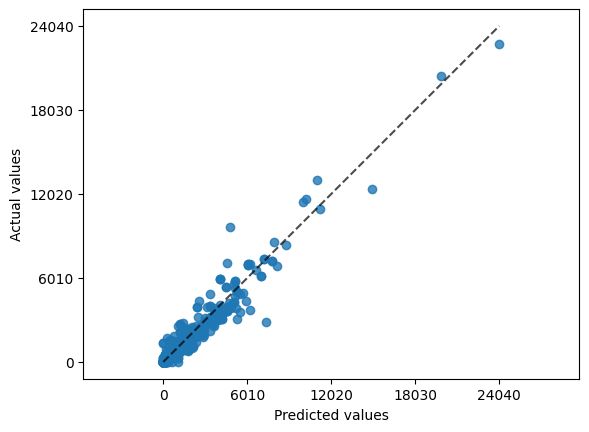

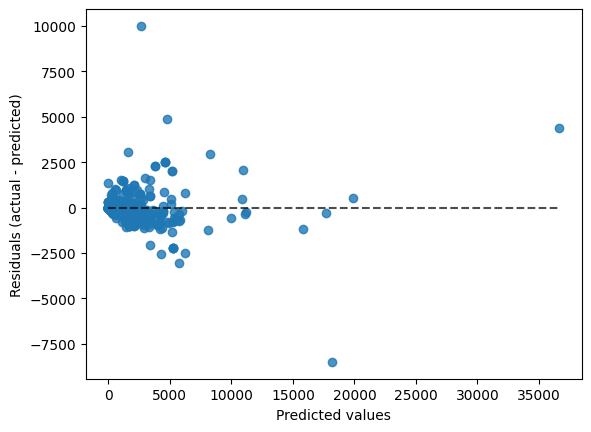

In [28]:
import sklearn.metrics as metrics

metrics.PredictionErrorDisplay.from_predictions(y_true=y_actual,y_pred=y_pred, kind="actual_vs_predicted")
metrics.PredictionErrorDisplay.from_predictions(y_true=y_actual,y_pred=y_pred, kind="residual_vs_predicted")

La línea indica los valores reales y los puntos muestran qué tan lejos se encuentran del valor real, se observa que no hay mucha variación respecto al valor real.

In [29]:
res=y_actual-y_pred
np.std(res) ### 95% ()

595.2499190889275

In [30]:
np.mean(res)

-46.713909550267445

En este caso tenemos un subajuste ya que la media de los residuales es superior a 0, es decir, estamos subestimando en 8 unidades.

# Entrega 2

In [31]:
#cargar base de datos nueva
url= "https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients2.csv"
credit_card3 = pd.read_csv(url)

In [32]:
credit_card3

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [33]:
# verificar nuevamente los nulos
credit_card3.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [35]:
# tratamiento de nulos
credit_card3= credit_card3.dropna()

In [36]:
# verificar nuevamente los nulos

credit_card3.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
# eliminar la variable CUST_ID

credit_card3 = credit_card3.drop('CUST_ID', axis=1)

credit_card3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   ONEOFF_PURCHASES                  8636 non-null   float64
 3   INSTALLMENTS_PURCHASES            8636 non-null   float64
 4   CASH_ADVANCE                      8636 non-null   float64
 5   PURCHASES_FREQUENCY               8636 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 9   CASH_ADVANCE_TRX                  8636 non-null   int64  
 10  PURCHASES_TRX                     8636 non-null   int64  
 11  CREDIT_LIMIT                      8636 non-null   float64
 12  PAYMEN

In [38]:
#Carga escalado y modelado

win_model_load = joblib.load('/content/drive/MyDrive/Colab Notebooks/win_model.joblib')

In [39]:
win_model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47617 (186.00 KB)
Trainable params: 47617 (186.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
sc2 = joblib.load('/content/drive/MyDrive/Colab Notebooks/sc.joblib')

In [47]:
#predicciones de datos nuevos

X_sc2 = sc2.transform(X_credit_card)

In [48]:
#PREDICCIONES NUEVAS

pred_nuev = win_model_load.predict(X_sc2)

270/270 [==============================] - 1s 2ms/step


In [49]:
#poner en un dataframe

data = pd.DataFrame(pred_nuev)

Predicciones de Julio a Diciembre 2023 Purchase

In [50]:
data

,0
0,126.492546
1,0.000000
2,1061.754150
3,141.349533
4,1615.733154
...,...
8631,301.643951
8632,272.780731
8633,144.482803
8634,120.656456


Data de enero a Junio de purchase 2023

In [51]:
y_credit_card

0         95.40
1          0.00
2        773.17
4         16.00
5       1333.28
         ...   
8943      20.90
8945     291.12
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8636, dtype: float64

In [61]:
suma_purchases = credit_card2['PURCHASES'].sum()

print('La suma de las compras en el periodo de enero a junio del 2023 fueron:', suma_purchases)

La suma de las compras en el periodo de enero a junio del 2023 fueron: 8855646.94


In [64]:
suma_purchases2 = pred_nuev.sum()
print('La suma de las compras en el periodo de julio a diciembre del 2023 fueron:', suma_purchases2)

La suma de las compras en el periodo de julio a diciembre del 2023 fueron: 9292573.0


En primer lugar se puede observar que la suma del número de compras en el periodo de julio a diciembre del 2023 es de 9.292.573 unidades monetarias
En segundo lugar se nota que sí se observan compras mayores que en el periodo de enero a julio, dado que las compras de este periodo son iguales a 8.855.646 obteniendo una diferencia de 436927

In [74]:
data= data.rename(columns={'0': 'Prediccion'})
data

,0
0,126.492546
1,0.000000
2,1061.754150
3,141.349533
4,1615.733154
...,...
8631,301.643951
8632,272.780731
8633,144.482803
8634,120.656456


In [95]:

sorted_pred_nuev = sorted(pred_nuev, reverse=True)

# Convertir la lista ordenada en un DataFrame
df = pd.DataFrame({'Columna_Ordenada': sorted_pred_nuev})

# Imprimir el DataFrame resultante
primeros_clientes= df.head(5)
primeros_clientes

,Columna_Ordenada
0,[43334.527]
1,[39851.47]
2,[38558.42]
3,[36666.02]
4,[29813.992]


In [96]:
primeros_clientes.mean()

Columna_Ordenada    37644.8875
dtype: float64

In [98]:
desviacion= np.std(res)

In [103]:
limite_sup= 37644.8875 + 2*desviacion
limite_sup

38835.387338177854

In [101]:
limite_inf= 37644.8875 - 2*desviacion
limite_inf

36454.38766182214

Con un intervalo de confianza del 95% obtuvimos como limite superior 38835.38 y limite inferior 36454.38. Cuando hacemos predicciones de compras, es normal tener cierta incertidumbre. El intervalo de confianza nos ayuda a cuantificar esa incertidumbre y proporciona un rango probable donde podríamos esperar que caigan las compras reales.

Para potenciar las compras de cada cliente, se aconseja la instauración de un programa de lealtad que premie la constancia, la adaptación de la experiencia de compra mediante el modelo diseñado para ofrecer sugerencias adaptadas, la emisión de ofertas exclusivas a través de diversos canales, la segmentación de clientes según sus comportamientos, la organización de eventos exclusivos, la obtención de retroalimentación mediante encuestas, la aplicación de programas de recomendación, la oferta de promociones particulares y el mantenimiento de una comunicación continua. Asimismo, se sugiere asegurar la satisfacción del cliente mediante políticas flexibles y ajustar estrategias en base a análisis constante. Estas iniciativas generarán un ambiente propicio para fortalecer la lealtad y la participación del cliente, incentivando así mayores niveles de compra.